# Backtesting

### Max Drawdown

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf      
import matplotlib.pyplot as plt
import math

In [3]:
start_date = "2023-01-01"
end_date = "2023-02-11"              
df = yf.download(['GOOG', 'MSFT'], start=start_date, end=end_date)
df.head()

[*********************100%***********************]  2 of 2 completed


Price                      Adj Close                  Close              \
Ticker                          GOOG        MSFT       GOOG        MSFT   
Date                                                                      
2023-01-03 00:00:00+00:00  89.480247  236.183533  89.699997  239.580002   
2023-01-04 00:00:00+00:00  88.492683  225.852112  88.709999  229.100006   
2023-01-05 00:00:00+00:00  86.557426  219.158371  86.769997  222.309998   
2023-01-06 00:00:00+00:00  87.944031  221.741226  88.160004  224.929993   
2023-01-09 00:00:00+00:00  88.582458  223.900162  88.800003  227.119995   

Price                           High                    Low              \
Ticker                          GOOG        MSFT       GOOG        MSFT   
Date                                                                      
2023-01-03 00:00:00+00:00  91.550003  245.750000  89.019997  237.399994   
2023-01-04 00:00:00+00:00  91.239998  232.869995  87.800003  225.960007   
2023-01-05 00:00:00+00:00  88.209999  227.550003  86.559998  221.759995   
2023-01-06 00:00:00+00:00  88.470001  225.759995  85.570000  219.350006   
2023-01-09 00:00:00+00:00  90.830002  231.240005  88.580002  226.410004   

Price                           Open                Volume            
Ticker                          GOOG        MSFT      GOOG      MSFT  
Date                                                                  
2023-01-03 00:00:00+00:00  89.830002  243.080002  20738500  25740000  
2023-01-04 00:00:00+00:00  91.010002  232.279999  27046500  50623400  
2023-01-05 00:00:00+00:00  88.070000  227.199997  23136100  39585600  
2023-01-06 00:00:00+00:00  87.360001  223.000000  26612600  43613600  
2023-01-09 00:00:00+00:00  89.195000  226.449997  22996700  27369800

In [4]:
df2 = df['Adj Close']
df2.loc["2023-02"]

Ticker,GOOG,MSFT
Date,,
2023-02-01 00:00:00+00:00,101.181519,249.166824
2023-02-02 00:00:00+00:00,108.533463,260.848816
2023-02-03 00:00:00+00:00,104.962234,254.687408
2023-02-06 00:00:00+00:00,103.216522,253.129822
2023-02-07 00:00:00+00:00,107.775330,263.766907
2023-02-08 00:00:00+00:00,99.755020,262.948669
2023-02-09 00:00:00+00:00,95.226143,259.882690
2023-02-10 00:00:00+00:00,94.627609,259.370056


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2023-01-03 00:00:00+00:00 to 2023-02-10 00:00:00+00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    28 non-null     float64
 1   MSFT    28 non-null     float64
dtypes: float64(2)
memory usage: 672.0 bytes


<Axes: xlabel='Date'>

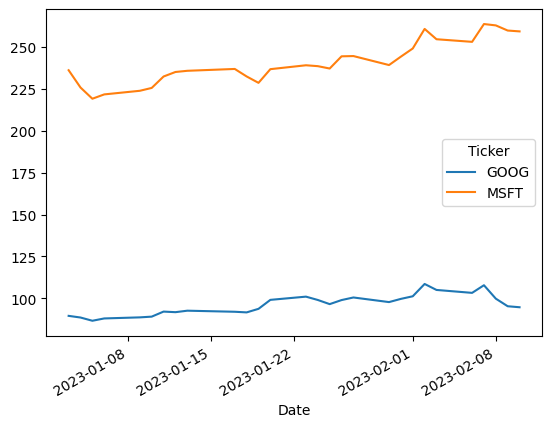

In [5]:
df2.info()
df2.plot.line()

Ticker                         GOOG      MSFT
Date                                         
2023-01-03 00:00:00+00:00       NaN       NaN
2023-01-04 00:00:00+00:00 -0.011037 -0.043743
2023-01-05 00:00:00+00:00 -0.021869 -0.029638
2023-01-06 00:00:00+00:00  0.016019  0.011785
2023-01-09 00:00:00+00:00  0.007259  0.009736


<Axes: xlabel='Date'>

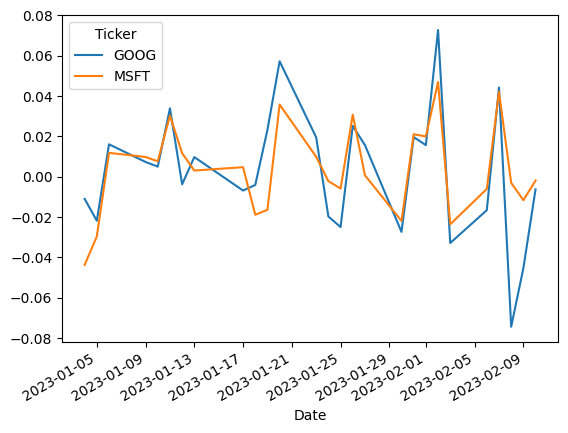

In [6]:
returns_df = df2.pct_change()
print(returns_df.head())
returns_df.plot.line()

#### wealth index

Ticker                            GOOG         MSFT
Date                                               
2023-01-03 00:00:00+00:00  1000.000000  1000.000000
2023-01-04 00:00:00+00:00   988.963329   956.256811
2023-01-05 00:00:00+00:00   967.335573   927.915543
2023-01-06 00:00:00+00:00   982.831778   938.851340
2023-01-09 00:00:00+00:00   989.966624   947.992263


<Axes: xlabel='Date'>

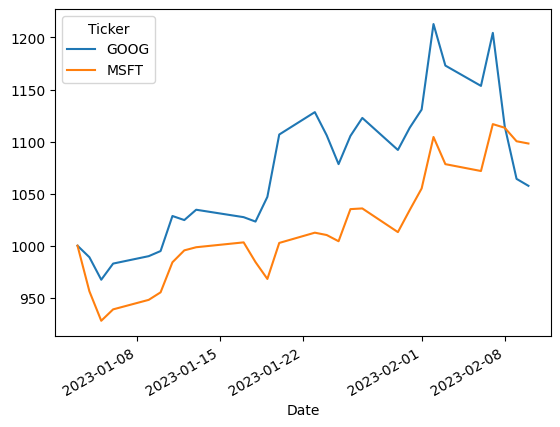

In [7]:
initial_wealth = 1000     
wealth_index_df = initial_wealth*(1+returns_df).cumprod()
wealth_index_df.loc["2023-01-03"] = initial_wealth
print(wealth_index_df.head())
wealth_index_df.plot.line()

Ticker                            GOOG         MSFT
Date                                               
2023-01-03 00:00:00+00:00  1000.000000  1000.000000
2023-01-04 00:00:00+00:00  1000.000000  1000.000000
2023-01-05 00:00:00+00:00  1000.000000  1000.000000
2023-01-06 00:00:00+00:00  1000.000000  1000.000000
2023-01-09 00:00:00+00:00  1000.000000  1000.000000
2023-01-10 00:00:00+00:00  1000.000000  1000.000000
2023-01-11 00:00:00+00:00  1028.539723  1000.000000
2023-01-12 00:00:00+00:00  1028.539723  1000.000000
2023-01-13 00:00:00+00:00  1034.559749  1000.000000
2023-01-17 00:00:00+00:00  1034.559749  1003.213937
2023-01-18 00:00:00+00:00  1034.559749  1003.213937
2023-01-19 00:00:00+00:00  1046.934374  1003.213937
2023-01-20 00:00:00+00:00  1106.800485  1003.213937
2023-01-23 00:00:00+00:00  1128.316631  1012.521801
2023-01-24 00:00:00+00:00  1128.316631  1012.521801
2023-01-25 00:00:00+00:00  1128.316631  1012.521801
2023-01-26 00:00:00+00:00  1128.316631  1035.144888
2023-01-27 0

<Axes: xlabel='Date'>

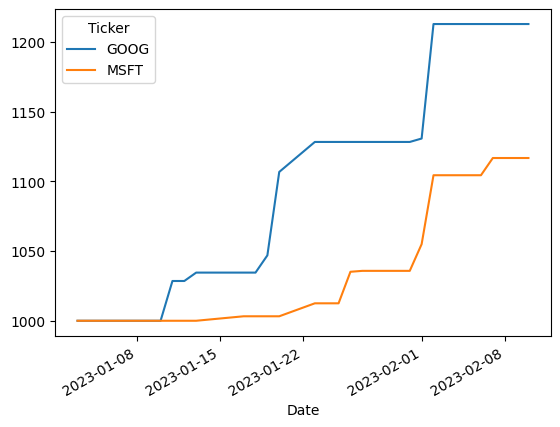

In [8]:
prior_peaks_df = wealth_index_df.cummax()
print(prior_peaks_df)
prior_peaks_df.plot.line()

Ticker                         GOOG      MSFT
Date                                         
2023-01-03 00:00:00+00:00  0.000000  0.000000
2023-01-04 00:00:00+00:00 -0.011037 -0.043743
2023-01-05 00:00:00+00:00 -0.032664 -0.072084
2023-01-06 00:00:00+00:00 -0.017168 -0.061149
2023-01-09 00:00:00+00:00 -0.010033 -0.052008
Ticker
GOOG   -0.128125
MSFT   -0.072084
dtype: float64


<Axes: xlabel='Date'>

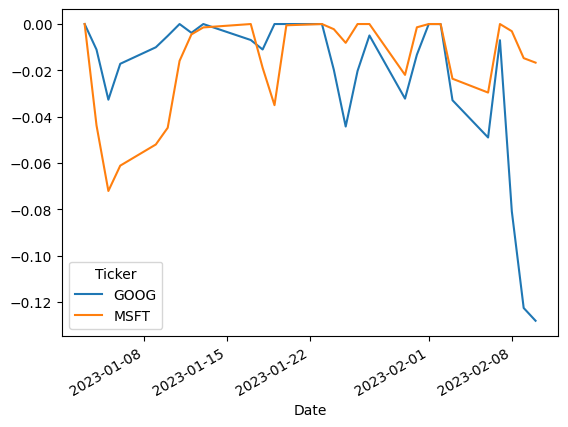

In [9]:
drawdown_df = (wealth_index_df - prior_peaks_df) / prior_peaks_df
print(drawdown_df.head())
print(drawdown_df.min())
drawdown_df.plot.line()

In [10]:
drawdown_df.loc["2023-01"].min()
drawdown_df.loc["2023-01"].idxmin()

Ticker
GOOG   2023-01-25 00:00:00+00:00
MSFT   2023-01-05 00:00:00+00:00
dtype: datetime64[ns, UTC]

<Axes: xlabel='Date'>

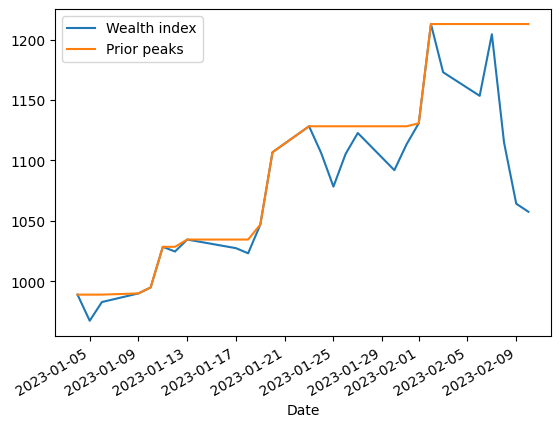

In [11]:
def drawdown(return_series : pd.Series):
    """
        Input: a time series of asset returns
        Output: a DataFrame that contains:
        - the wealth index
        - the prior peaks
        - percentage drawdowns       
    """
    wealth_index_series = initial_wealth*(1+return_series).cumprod()
    prior_peaks_series = wealth_index_series.cummax()              
    drawdown_series = (wealth_index_series - prior_peaks_series) / prior_peaks_series
    return pd.DataFrame({
        "Wealth index": wealth_index_series,
        "Prior peaks": prior_peaks_series,
        "Drawdown": drawdown_series
    })

drawdown(returns_df["GOOG"]).head()
drawdown(returns_df["GOOG"])[['Wealth index', 'Prior peaks']].plot.line()

### backtesting the trend following strategy

In [12]:
df_goog = yf.download(['GOOG'], start="2022-01-01", end="2023-01-01")['Adj Close']
df_goog = pd.DataFrame(df_goog)
df_goog.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2022-01-03,144.719086
2022-01-04,144.062714
2022-01-05,137.316284
2022-01-06,137.214035
2022-01-07,136.668869


In [13]:
sma_span = 30
ema_span = 5
short_ma = 'ema'+str(ema_span)
long_ma ='sma'+str(sma_span)
df_goog[long_ma] = df_goog['Adj Close'].rolling(sma_span).mean()   
df_goog[short_ma] = df_goog['Adj Close'].ewm(span=ema_span).mean()
df_goog.dropna(inplace=True)
df_goog.head()

,Adj Close,sma30,ema5
Date,,,
2022-02-14,134.968536,136.999303,136.728800
2022-02-15,136.091278,136.711710,136.516292
2022-02-16,137.150681,136.481308,136.727755
2022-02-17,131.984375,136.303578,135.146626
2022-02-18,130.147873,136.068039,133.480373


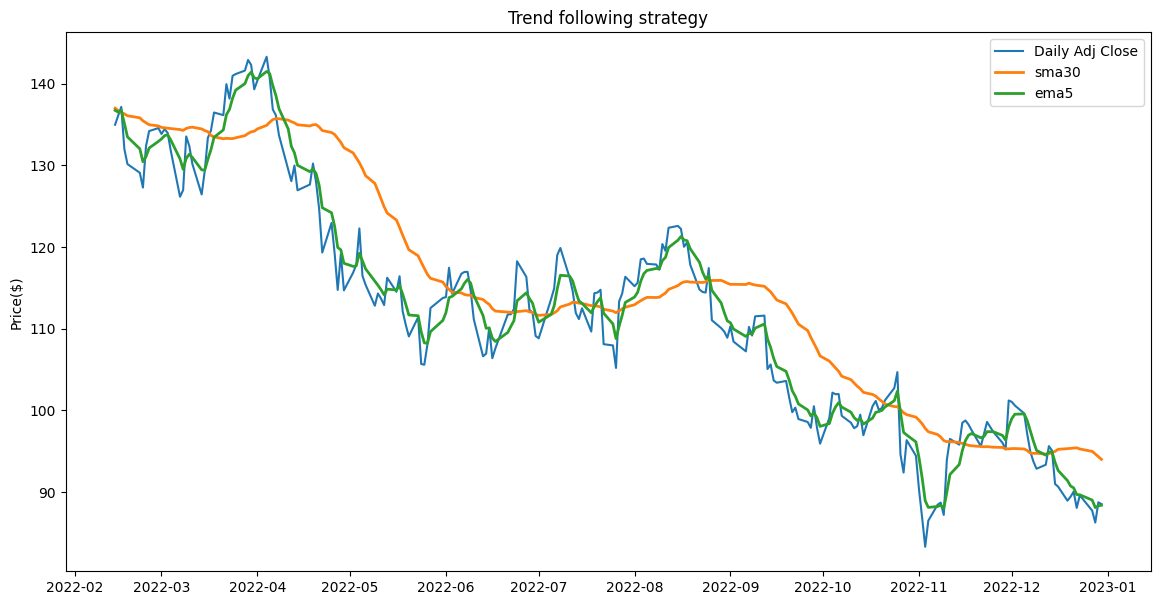

In [14]:
fig = plt.figure(figsize=(14,7))

              
plt.plot(df_goog.index, df_goog['Adj Close'], linewidth=1.5, label='Daily Adj Close')
plt.plot(df_goog.index, df_goog[long_ma], linewidth=2, label=long_ma)
plt.plot(df_goog.index, df_goog[short_ma], linewidth=2, label=short_ma)
plt.title("Trend following strategy")
plt.ylabel('Price($)')  
plt.legend()

In [15]:
#                Calculating the log returns of the buy-and-hold strategy
df_goog['log_return_buy_n_hold'] = np.log(df_goog['Adj Close']).diff()

In [16]:
# identify buy signal
df_goog['signal'] = np.where(df_goog[short_ma] > df_goog[long_ma], 1, 0)
# identify sell signal
df_goog['signal'] = np.where(df_goog[short_ma] < df_goog[long_ma], -1, df_goog['signal'])
df_goog.dropna(inplace=True)
df_goog['log_return_trend_follow'] = df_goog['signal'] * df_goog['log_return_buy_n_hold']

### annualized return

```math
    \begin{split}
        \text{annualized return} & = (1+\frac{R}{n})^{1 \times n}-1
    \end{split}\\
    \begin{split}
        \text{where:}\\
        \text{R} &= \text{annual rate}\\
    \end{split}\\
```
```math
    \begin{split}
        \text{annualized return} & = (\frac{x_1}{x_\text{0}})(\frac{x_2}{x_\text{1}})...(\frac{x_n}{x_\text{n-1}})^\frac{252}{\text{n}}-1
    \end{split}

```

In [17]:
# terminal return of buy-n-hold
print(np.exp(df_goog['log_return_buy_n_hold']).cumprod().iloc[-1] -1)
# terminal return of trend following
print(np.exp(df_goog['log_return_trend_follow']).cumprod().iloc[-1] -1)

# calculate annualized return of buy-n-hold (compound interest)
annualized_return_buy_n_hold = np.exp(df_goog['log_return_buy_n_hold']).prod()**(252/df_goog.shape[0])-1
print(annualized_return_buy_n_hold)

# calculate annualized return of trend following
annualized_return_trend_follow = np.exp(df_goog['log_return_trend_follow']).prod()**(252/df_goog.shape[0])-1
print(annualized_return_trend_follow)

-0.3441980134530237
0.3609147459363726
-0.3818823214821667
0.4210310999624822


### annualized volatility

```math
\begin{align}
\sigma_P &= \sqrt{\frac{\sum_{i=1}^{n}(R_i-R_p)^2}{N}} \\
\sigma_{P,T} &= \sqrt{T}\times\sigma_P \\
\end{align}\\

\begin{split}\\
e.g:& \text{daily returns}(T=252) \text{ monthly returns}(T=12)\\
& \text{standard deviation}( \sigma) = 0.001 \\
& 0.001\times\sqrt{252} \approx 1.59\%
 
\end{split}
```

In [18]:
annualized_vol_buy_n_hold = (np.exp(df_goog['log_return_buy_n_hold'])-1).std()*math.sqrt(252)
print(annualized_vol_buy_n_hold)
annualized_vol_trend_follow = (np.exp(df_goog['log_return_trend_follow'])-1).std()*math.sqrt(252)
print(annualized_vol_trend_follow)

0.3896836515840243
0.3928554964318044


### sharpe

In [19]:
riskfree_rate = 0.03
sharpe_ratio_buy_n_hold = (annualized_return_buy_n_hold - riskfree_rate) / annualized_vol_buy_n_hold
print(sharpe_ratio_buy_n_hold)
sharpe_ratio_trend_follow = (annualized_return_trend_follow - riskfree_rate) / annualized_vol_trend_follow
print(sharpe_ratio_trend_follow)

-1.0569658742621282
0.9953560622521699


### max drawdown

In [20]:
max_drawdown_buy_n_hold = drawdown(np.exp(df_goog['log_return_buy_n_hold'])-1)['Drawdown'].min()
print(max_drawdown_buy_n_hold)

max_drawdown_trend_follow = drawdown(np.exp(df_goog['log_return_trend_follow'])-1)['Drawdown'].min()
print(max_drawdown_trend_follow)

-0.4187653669436329
-0.20685364064582548
